<a href="https://colab.research.google.com/github/NusratJahanTania/CIND820_Online-Retail_project/blob/main/Online_Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     | 22.6 MB 21.4 MB/s 0:00:02
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 KB 4.0 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=345010 sha256=4a606a709d5ab6f0f156263fcfbaf958404f0d99d8deb606b10cd5a0354f9894
  Stored in directory: /tmp/pip-ephem-wheel-cache-om3haaat/wheels/43/c8/f4/c0ebc32d7f20fe89d0e92d90eaeef5f0c0594a89b6bc16b352
Successfully built ydata-profiling
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.65.0
    Uninstalling tqdm-4.65.0:
      Successfully uninstalled tqdm-4.65.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.1

In [1]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.lib.function_base import median
import scipy
import scipy.stats as stats
import math
import datetime

<ipython-input-1-aeba76f81b6d>:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [24]:
# read the file and save in online_retail_df data frame
online_retail_df = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx")


In [25]:
online_retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [26]:
#prints information about the DataFrame. 
online_retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [27]:
#computes and displays summary statistics for a dataframe.
online_retail_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


**Let's generate report for the dataset**

Pandas profiling offers report generation for the dataset with lots of features and customizations for the report generated.

In [28]:
profile = ProfileReport(online_retail_df, title='Online Retail', html={'style':{'full_width':True}})

In [29]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [30]:
profile.to_file(output_file='Online_Retail.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**Let's study different features of the dataset**

In [31]:
online_retail_df.Country.value_counts().reset_index().head(20)

,index,Country
0,United Kingdom,495478
1,Germany,9495
2,France,8557
3,EIRE,8196
4,Spain,2533
5,Netherlands,2371
6,Belgium,2069
7,Switzerland,2002
8,Portugal,1519
9,Australia,1259


From the above list of Countries, we can see United Kigdom made 495478/541909 * 100 = 91.43% transactions of the total transactions in the dataset.

In [32]:
online_retail_df.CustomerID.unique().shape

(4373,)

In [33]:
online_retail_df.StockCode.unique().shape

(4070,)

In [34]:
online_retail_df.Description.unique().shape

(4224,)

From the above, we observed that there is a mismatch between StockCode and Description. Number of Descriptions more than the Stock code values,which means that we have multiple descriptions for some of the Stockcodes.

**Review the Numeric features to manage the outliers**

As the median is less affected by outliers and skewed data than the mean and is usually the preferred measure of central tendency when the distribution is not symmetrical, I will replace the outliers with the median value.

**Plot a boxplot for UnitPrice to see if there are any outliers**

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


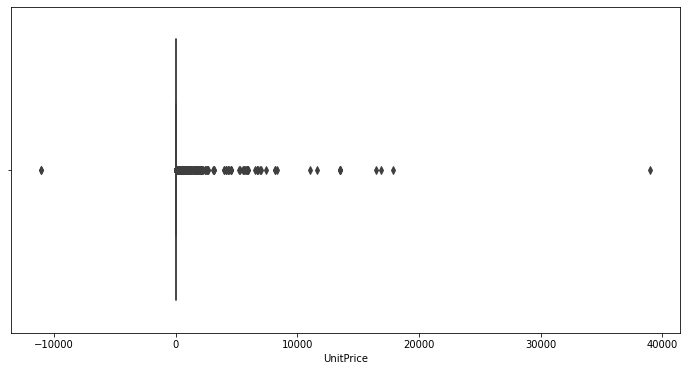

In [35]:
plt.subplots(figsize = (12, 6))
up = sns.boxplot(online_retail_df.UnitPrice)

**Replace outliers with median value of UnitPrice**

In [36]:
from numpy.lib.function_base import median
median_up = online_retail_df['UnitPrice'].median()
median_up

2.08

The median value of the UnitPrice is 2.08. I will replace the UnitPrice values that are more than 20000 with the median value.

In [37]:
online_retail_df['UnitPrice'] = online_retail_df['UnitPrice'].mask(online_retail_df['UnitPrice'] > 20000, median_up)

**Plotting UnitPrice again after replacing outliers**

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


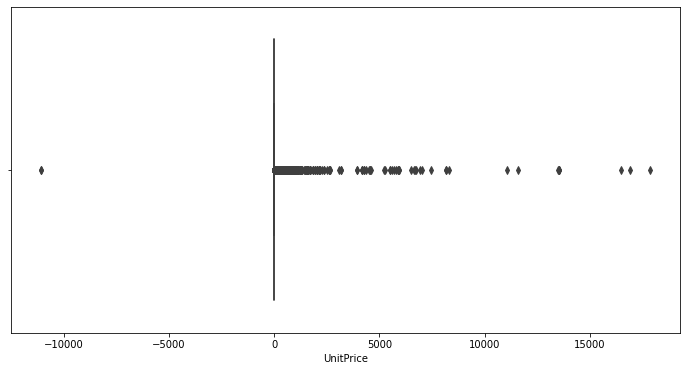

In [38]:
plt.subplots(figsize = (12, 6))
up = sns.boxplot(online_retail_df.UnitPrice)

**Plot a boxplot for Quantity to see if there are any outliers**

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


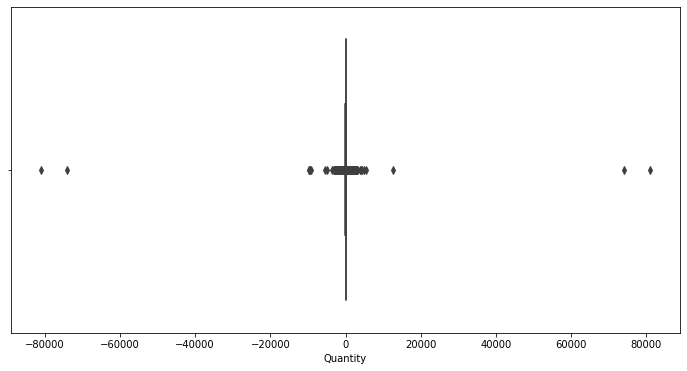

In [39]:
plt.subplots(figsize = (12, 6))
quantity = sns.boxplot(online_retail_df.Quantity)

In [40]:
from numpy.lib.function_base import median
median_qnt = online_retail_df['Quantity'].median()
median_qnt

3.0

In [41]:
online_retail_df['Quantity'] = online_retail_df['Quantity'].mask(online_retail_df['Quantity'] > 25000, median_qnt)

**Plotting Quantity again after replacing outliers**

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


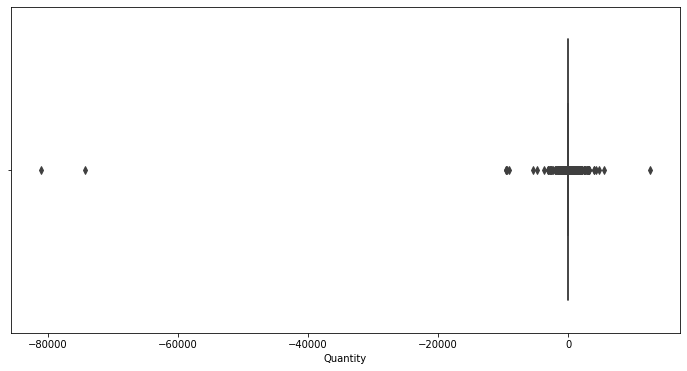

In [42]:
plt.subplots(figsize = (12, 6))
quantity = sns.boxplot(online_retail_df.Quantity)

**Convert the text in the desc column to lowercase to make the text more readable:**

In [44]:
online_retail_df.Description = online_retail_df.Description.str.lower()
online_retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


**Adding 4 new columns: Month, Day, Day_of_Week, and Hour**

Adding new columns to facilitate visulizing different transaction throught the year


In [45]:
online_retail_df['Month'] = pd.to_datetime(online_retail_df['InvoiceDate']).dt.month
online_retail_df['Day'] = pd.to_datetime(online_retail_df['InvoiceDate']).dt.day
online_retail_df['Day_of_Week'] = pd.to_datetime(online_retail_df['InvoiceDate']).dt.day_name()
online_retail_df['Hour'] = pd.to_datetime(online_retail_df['InvoiceDate']).dt.hour

In [46]:
online_retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,Day_of_Week,Hour
0,536365,85123A,white hanging heart t-light holder,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,1,Wednesday,8
1,536365,71053,white metal lantern,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,1,Wednesday,8
2,536365,84406B,cream cupid hearts coat hanger,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,1,Wednesday,8
3,536365,84029G,knitted union flag hot water bottle,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,1,Wednesday,8
4,536365,84029E,red woolly hottie white heart.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,1,Wednesday,8


**Adding another column named: Amount**

Adding Amount column to track the total amount spent in each transaction

In [47]:
online_retail_df['Amount'] = online_retail_df.Quantity * online_retail_df.UnitPrice
online_retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,Day_of_Week,Hour,Amount
0,536365,85123A,white hanging heart t-light holder,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,1,Wednesday,8,15.30
1,536365,71053,white metal lantern,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,1,Wednesday,8,20.34
2,536365,84406B,cream cupid hearts coat hanger,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,1,Wednesday,8,22.00
3,536365,84029G,knitted union flag hot water bottle,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,1,Wednesday,8,20.34
4,536365,84029E,red woolly hottie white heart.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,1,Wednesday,8,20.34


In [48]:
online_retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540454 non-null  object        
 3   Quantity     541909 non-null  float64       
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   Month        541909 non-null  int64         
 9   Day          541909 non-null  int64         
 10  Day_of_Week  541909 non-null  object        
 11  Hour         541909 non-null  int64         
 12  Amount       541909 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 53.7+ MB


**Bivariate Analysis and Visualization**

Correlation between Quantity and Amount

In [49]:
online_retail_df[['Quantity','Amount']].corr()

,Quantity,Amount
Quantity,1.000000,0.848014
Amount,0.848014,1.000000


Correlation between Quantity and Amount spent is 0.848014 that is strongly positively related.

Correlation between UnitPrice and Amount

In [50]:
online_retail_df[['UnitPrice','Amount']].corr()

,UnitPrice,Amount
UnitPrice,1.000000,-0.139142
Amount,-0.139142,1.000000


UnitPrice has fairly negative relation with Amount spent.

**Number of Orders made by Customers**

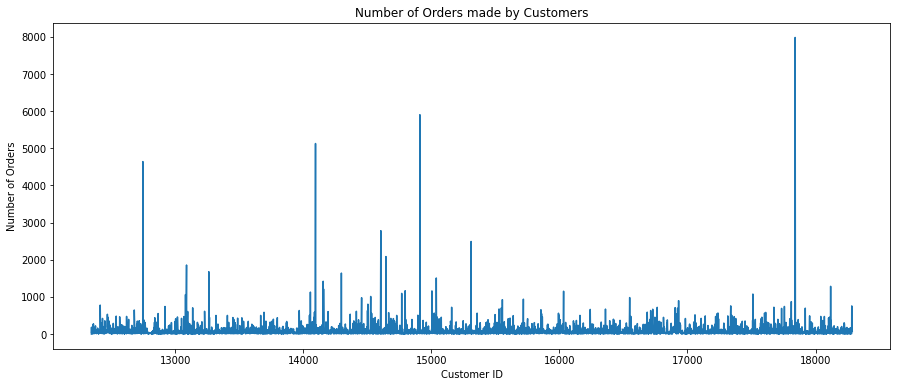

In [51]:
ord_cust = online_retail_df.groupby(by = ['CustomerID'], as_index = False)['InvoiceNo'].count()
plt.subplots(figsize = (15, 6))
oc = plt.plot(ord_cust.CustomerID, ord_cust.InvoiceNo)
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders made by Customers')
plt.show()

Graph shows only few customers had proactively made huge numbers of transactions between 01/12/2010 and 09/12/2011 and among them highest number of orders more than 7500 from a customer. 

**Amount Spent by Customers**

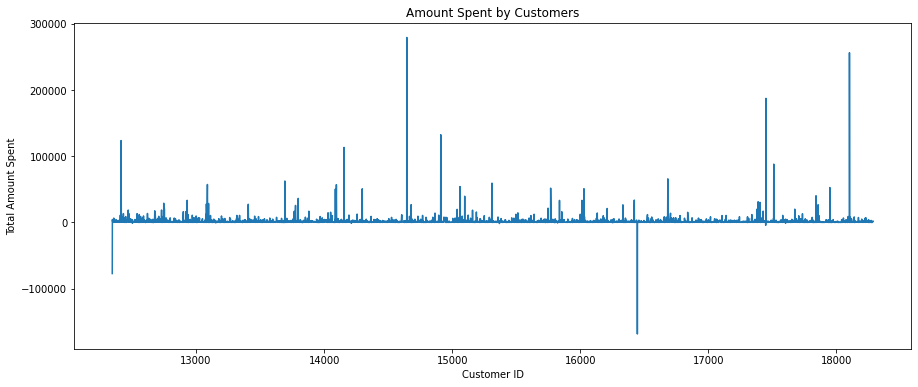

In [52]:
spent_cust = online_retail_df.groupby(by = ['CustomerID'], as_index = False)['Amount'].sum()

plt.subplots(figsize = (15, 6))
sc = plt.plot(spent_cust.CustomerID, spent_cust.Amount)
plt.xlabel('Customer ID')
plt.ylabel('Total Amount Spent')
plt.title('Amount Spent by Customers')
plt.show()

Amount Spent by Customers: most amount spent in the UK-based online retail store is more than 250000 dollar/euro. few customers spent negative amount that represents the return transactions.

**Monthly Spent Amount analysis**

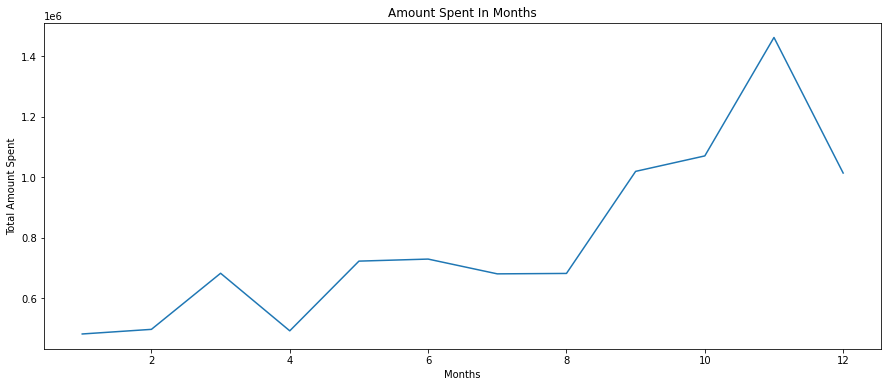

In [53]:
monthly_data = online_retail_df.groupby(by = ['Month'], as_index = False)['Amount'].sum()
plt.subplots(figsize = (15, 6))
sc = plt.plot(monthly_data.Month, monthly_data.Amount)
plt.xlabel('Months')
plt.ylabel('Total Amount Spent')
plt.title('Amount Spent In Months')
plt.show()

Abouve graphs illustrates that most amount spent by the customer is at the last few months of the year, mostly in the month of November, the reason behind this probably the holiday seasons in December.

**Orders Per Month**

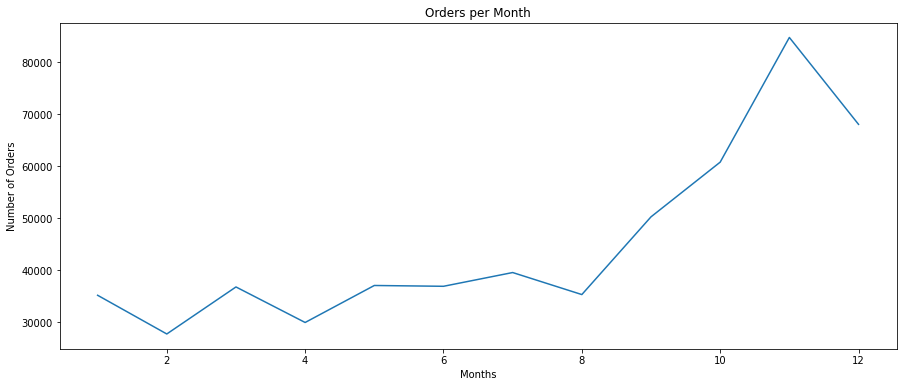

In [54]:
monthly_order_data = online_retail_df.groupby(by = ['Month'], as_index = False)['InvoiceNo'].count()
plt.subplots(figsize = (15, 6))
sc = plt.plot(monthly_order_data.Month, monthly_order_data.InvoiceNo)
plt.xlabel('Months')
plt.ylabel('Number of Orders')
plt.title('Orders per Month')
plt.show()

Above graph illustrates that most of the orders made by the customer is at the last few months of the year, mostly in the month of November, the reason behind this probably the holiday seasons in December.

**Amount Spent in Hourly basis**

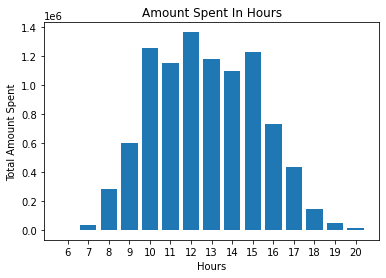

In [55]:
hour_data = online_retail_df.groupby(by = ['Hour'], as_index = False)['Amount'].sum()
plt.bar(hour_data['Hour'], hour_data['Amount'])
plt.xticks(range(6,21))
plt.xlabel('Hours')
plt.ylabel('Total Amount Spent')
plt.title('Amount Spent In Hours')
plt.show()

Most amount spent mostly in the time from 10am to 15pm.

**Orders made in Hourly basis**

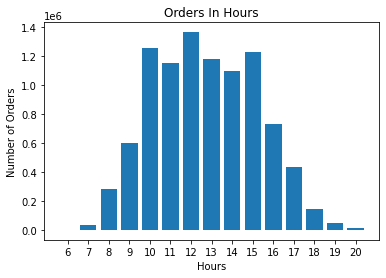

In [57]:
hourly_order_data = online_retail_df.groupby(by = ['Hour'], as_index = False)['InvoiceNo'].count()
plt.bar(hour_data['Hour'], hour_data['Amount'])
plt.xticks(range(6,21))
plt.xlabel('Hours')
plt.ylabel('Number of Orders')
plt.title('Orders In Hours')
plt.show()

Most of the Orders made in the time from 10am to 15pm.

**Amount Spent in weekday basis**

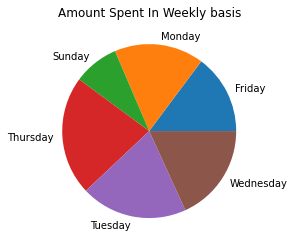

In [58]:
weekday_data = online_retail_df.groupby(by = ['Day_of_Week'], as_index = False)['Amount'].sum()
plt.pie(weekday_data['Amount'], labels=weekday_data['Day_of_Week'])
plt.title('Amount Spent In Weekly basis')
plt.show()

From the above piechart, it’s observed that most of the amount spent in the weekdays Monday to Friday. Sunday shows very little amount spent and on Saturday store seems remain closed as there is no amount spent in this day at weekend. 

**Orders made in weekday basis**

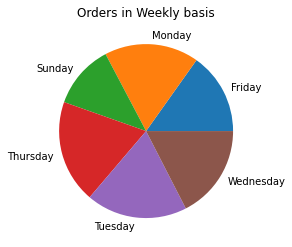

In [59]:
weekday_data = online_retail_df.groupby(by = ['Day_of_Week'], as_index = False)['InvoiceNo'].count()
plt.pie(weekday_data['InvoiceNo'], labels=weekday_data['Day_of_Week'])
plt.title('Orders in Weekly basis')
plt.show()

From the above piechart, it’s observed that most of the orders made in the weekdays Monday to Friday. Sunday shows very little number of orders and on Saturday store seems remain closed as there is no order made in this day at weekend. 

**RFM Model**

The RFM model is a behavioral segmentation method that allows you to segment and analyze customers based on three variables in your historical data: Recency (R), frequency (F), and monetary value (M). 

*   Recency shows how recently a customer made transations from the store. 
*   Frequency reflects how often a customer purchases from the store.
*   The monetary value represents how much a customer usually spends with the store.


**Data Preprocessing for creating the RFM model**

1. Remove negative or return transactions as I am targetting for positive transactions 

In [60]:
online_retail_df=online_retail_df[~(online_retail_df['Amount']<0)]
print(online_retail_df.shape)
online_retail_df.head()

(532619, 13)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,Day_of_Week,Hour,Amount
0,536365,85123A,white hanging heart t-light holder,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,1,Wednesday,8,15.30
1,536365,71053,white metal lantern,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,1,Wednesday,8,20.34
2,536365,84406B,cream cupid hearts coat hanger,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,1,Wednesday,8,22.00
3,536365,84029G,knitted union flag hot water bottle,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,1,Wednesday,8,20.34
4,536365,84029E,red woolly hottie white heart.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,1,Wednesday,8,20.34


2. Remove transactions having missing values for the Customer ID field as I am going the segment the customers into groups. So, cusomers without identification do not become part of the groups.

In [61]:
online_retail_df=online_retail_df[~(online_retail_df.CustomerID.isnull())]
print(online_retail_df.shape)
online_retail_df.head()

(397924, 13)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,Day_of_Week,Hour,Amount
0,536365,85123A,white hanging heart t-light holder,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,1,Wednesday,8,15.30
1,536365,71053,white metal lantern,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,1,Wednesday,8,20.34
2,536365,84406B,cream cupid hearts coat hanger,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,1,Wednesday,8,22.00
3,536365,84029G,knitted union flag hot water bottle,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,1,Wednesday,8,20.34
4,536365,84029E,red woolly hottie white heart.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,1,Wednesday,8,20.34


Create the RFM model (Recency, Frequency,Monetary value)

Recency: how recently a customer has made transaction

To create a Recency feature variable, we need to decide the reference date for analysis and I wil define the reference date as one day before the last transaction.

In [64]:
ref_date=online_retail_df.InvoiceDate.max()
ref_date=ref_date+datetime.timedelta(days=1)#timedelta function returns to total number of seconds
print(online_retail_df.InvoiceDate.max(),online_retail_df.InvoiceDate.min())
ref_date

2011-12-09 12:50:00 2010-12-01 08:26:00


Timestamp('2011-12-10 12:50:00')

I will construct a reference variable as number of days before the reference date when a customer last made a purchase.

In [65]:
online_retail_df['days_since_last_purchase']=ref_date-online_retail_df.InvoiceDate
online_retail_df['days_since_last_purchase_num']=online_retail_df['days_since_last_purchase'].astype('timedelta64[D]')
online_retail_df['days_since_last_purchase_num'].head()    

0    374.0
1    374.0
2    374.0
3    374.0
4    374.0
Name: days_since_last_purchase_num, dtype: float64

Customer history of last transactions

In [66]:
cust_hist_df=online_retail_df.groupby('CustomerID').min().reset_index()[['CustomerID', 'days_since_last_purchase_num']]
cust_hist_df.rename(columns={'days_since_last_purchase_num':'Recency'}, inplace=True)
print(cust_hist_df.describe())
cust_hist_df.head()

         CustomerID      Recency
count   4339.000000  4339.000000
mean   15299.936852    92.518322
std     1721.889758   100.009747
min    12346.000000     1.000000
25%    13812.500000    18.000000
50%    15299.000000    51.000000
75%    16778.500000   142.000000
max    18287.000000   374.000000


<ipython-input-66-aab3e90c8133>:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  cust_hist_df=online_retail_df.groupby('CustomerID').min().reset_index()[['CustomerID', 'days_since_last_purchase_num']]


,CustomerID,Recency
0,12346.0,326.0
1,12347.0,2.0
2,12348.0,75.0
3,12349.0,19.0
4,12350.0,310.0


Distribution of customer recency

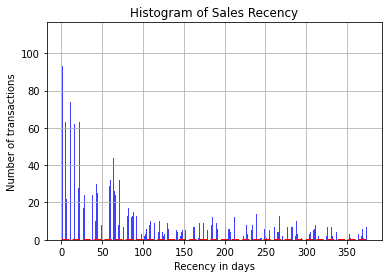

In [67]:
x=cust_hist_df.Recency
mu=np.mean(x)
sigma=math.sqrt(np.var(x))
n,bins,patches=plt.hist(x,1000,facecolor='blue',alpha=0.75)#alpha=transparency parameter
# Add a best fit line
y=scipy.stats.norm.pdf(bins,mu,sigma)#norm.pdf-probability density function for norm
l=plt.plot(bins,y,'r--',lw=2)

plt.xlabel('Recency in days')
plt.ylabel('Number of transactions')
plt.title('Histogram of Sales Recency')
plt.grid(True)
plt.show()

I have a skewd distribution of sales recency with a much higher frequent number of transactions and a fairly unifirm number of sales less in recent transactions.

Frequency and Monetary value

In [68]:
cust_monetary_val=online_retail_df[['CustomerID','Amount']].groupby('CustomerID').sum().reset_index()
cust_hist_df=cust_hist_df.merge(cust_monetary_val,how='outer')
cust_hist_df.Amount=cust_hist_df.Amount+0.001
customer_freq=online_retail_df[['CustomerID','Amount']].groupby('CustomerID').count().reset_index()
customer_freq.rename(columns={'Amount':'Frequency'},inplace=True)
cust_hist_df=cust_hist_df.merge(customer_freq,how='outer')

cust_hist_df=pd.DataFrame(cust_hist_df,columns=['CustomerID','Recency','Amount','Frequency'])
cust_hist_df.head()

,CustomerID,Recency,Amount,Frequency
0,12346.0,326.0,3.121,1
1,12347.0,2.0,4310.001,182
2,12348.0,75.0,1797.241,31
3,12349.0,19.0,1757.551,73
4,12350.0,310.0,334.401,17


Data Preprocessing

(Note: StandardScaler comes into play when the characteristics of the input dataset differ greatly between their ranges, or simply when they are measured in different units of measure. StandardScaler removes the mean and scales the data to the unit variance.)

In [69]:
from sklearn import preprocessing
cust_hist_df['Recency_log'] = cust_hist_df['Recency'].apply(math.log)
cust_hist_df['Frequency_log'] = cust_hist_df['Frequency'].apply(math.log)
cust_hist_df['Amount_log'] = cust_hist_df['Amount'].apply(math.log)
feature_vector=['Recency_log','Frequency_log','Amount_log']
X=cust_hist_df[feature_vector].values
scaler=preprocessing.StandardScaler()
X_scaled=scaler.fit_transform(X)

Visualizing Recency and Frequency vs Monetary Value (Scaled)

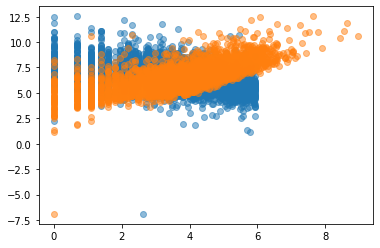

In [72]:
plt.scatter(cust_hist_df.Recency_log,cust_hist_df.Amount_log,alpha=0.5)

plt.scatter(cust_hist_df.Frequency_log,cust_hist_df.Amount_log,alpha=0.5)

Visualizing Monetary Value distribution

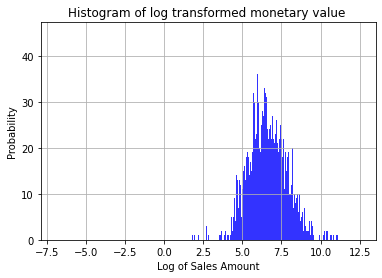

In [73]:
x=cust_hist_df.Amount_log
n,bins,patches=plt.hist(x,1000,facecolor='b',alpha=0.8)
plt.xlabel('Log of Sales Amount')
plt.ylabel('Probability')
plt.title('Histogram of log transformed monetary value ')
plt.grid(True)
plt.show()

Visualization of RFM model on 3D plot

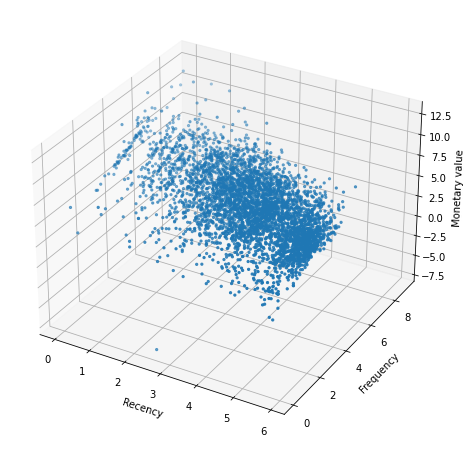

In [74]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection='3d')
xs=cust_hist_df.Recency_log
ys=cust_hist_df.Frequency_log
zs=cust_hist_df.Amount_log
ax.scatter(xs,ys,zs,s=5)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary value')
plt.show()

We can observe that from 3D plot, people who buy with a higher frequency and more Recency tends to spend more based on the increasing trend in monetray value corresponding inceasing and decreasing trend on frequency and recency, respectively.

Clustering for Customer segements by using KMeans Custering algorithm.

The silhouette coefficient is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors:

*   How close the data point is to other points in the cluster
*   How far away the data point is from points in other clusters
Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters.




**Customer segmentation for Recency vs Monetary Value**

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


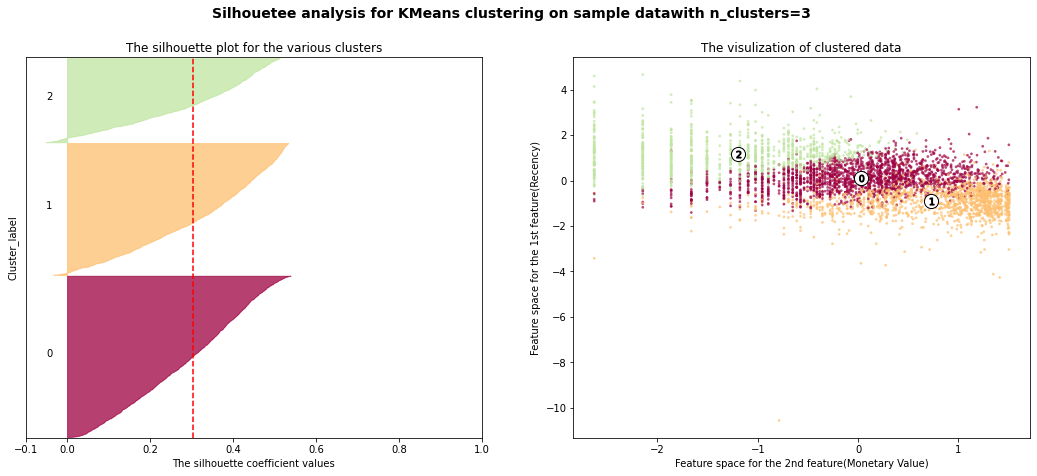

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


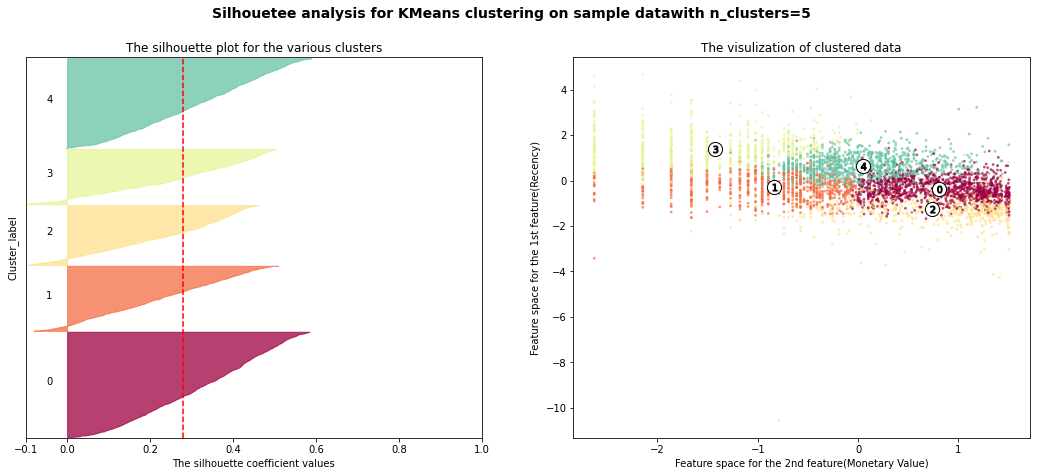

In [75]:
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples,silhouette_score
X=X_scaled
cluster_centers=dict()
for n_clusters in range(3,6,2):
    fig,(ax1,ax2)=plt.subplots(1,2)
    fig.set_size_inches(18,7)
    ax1.set_xlim([-0.1,1])
    ax1.set_ylim([0,len(X)+(n_clusters+1)*10])
    
    clusterer=KMeans(n_clusters=n_clusters,random_state=10)
    cluster_labels=clusterer.fit_predict(X)
    
    silhouette_avg=silhouette_score(X,cluster_labels)
    cluster_centers.update({n_clusters:{'cluster_centre':clusterer.cluster_centers_,
                                       'silhouette_score':silhouette_avg,
                                       'labels':cluster_labels}
                           })
    
    sample_silhouette_values=silhouette_samples(X,cluster_labels)
    y_lower=10
    for i in range(n_clusters):
        ith_cluster_silhouette_values=sample_silhouette_values[cluster_labels==i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i=ith_cluster_silhouette_values.shape[0]
        y_upper=y_lower+size_cluster_i
    
        cmap = cm.get_cmap("Spectral")
        color=cmap(float(i)/n_clusters)
        ax1.fill_betweenx(np.arange(y_lower,y_upper),0,
                ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.75)
        ax1.text(-0.05,y_lower+0.5*size_cluster_i,str(i))
        y_lower=y_upper+10 # 10 for 0 samples
        
    ax1.set_title('The silhouette plot for the various clusters')
    ax1.set_xlabel('The silhouette coefficient values')
    ax1.set_ylabel('Cluster_label')
    ax1.axvline(x=silhouette_avg,color='red',linestyle='--')
    ax1.set_yticks([])
    ax1.set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])

    colors=cmap(cluster_labels.astype(float)/n_clusters)
    feature1=0
    feature2=2
    ax2.scatter(X[:,feature1],X[:,feature2],marker='.',s=30,
                    lw=0,alpha=0.7,edgecolor='k',c=colors)
    centers=clusterer.cluster_centers_
    ax2.scatter(centers[:,feature1],centers[:,feature2],marker="o",
                   alpha=1,c='white',s=200,edgecolor='k')
    for i,c in enumerate(centers):
        ax2.scatter(c[feature1],c[feature2],marker='$%d$'%i,alpha=1,
                       edgecolor='k',s=50)
    ax2.set_title('The visulization of clustered data')
    ax2.set_xlabel('Feature space for the 2nd feature(Monetary Value)')
    ax2.set_ylabel('Feature space for the 1st feature(Recency)')
    plt.suptitle('Silhouetee analysis for KMeans clustering on sample data' 'with n_clusters=%d'
                         % n_clusters,fontsize=14,fontweight='bold')
    plt.show()

**Cluster Segmentation for Frequency vs Monetary value**

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


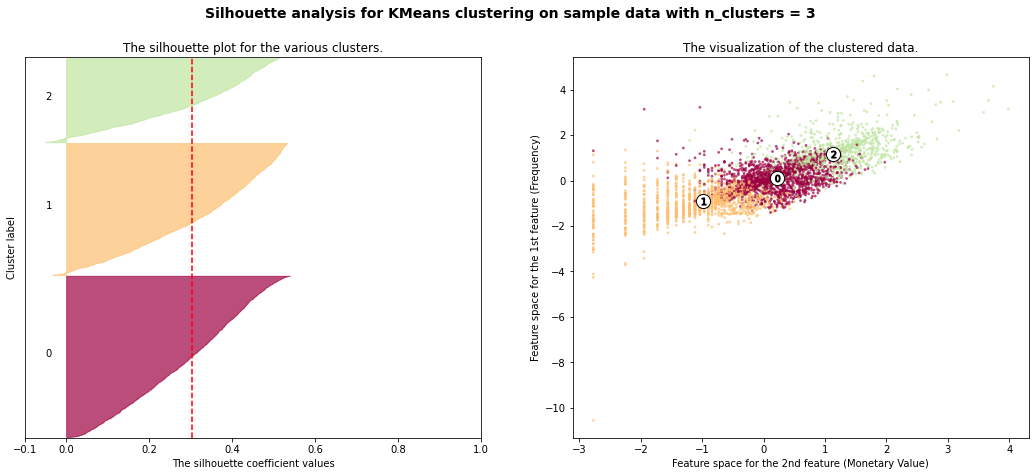

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


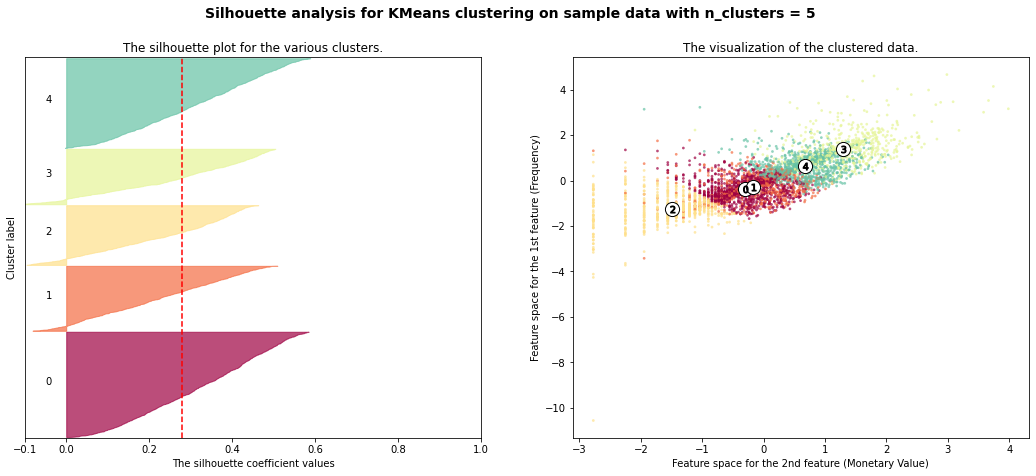

In [76]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

X = X_scaled

cluster_centers = dict()

for n_clusters in range(3,6,2):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    #ax2 = plt.subplot(111, projection='3d')
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    cluster_centers.update({n_clusters :{
                                        'cluster_center':clusterer.cluster_centers_,
                                        'silhouette_score':silhouette_avg,
                                        'labels':cluster_labels}
                           })
    
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        cmap=cm.get_cmap('Spectral')
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    colors = cmap(cluster_labels.astype(float) / n_clusters)
    feature1 = 1
    feature2 = 2
    ax2.scatter(X[:, feature1], X[:, feature2], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, feature1], centers[:, feature2], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[feature1], c[feature2], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 2nd feature (Monetary Value)")
    ax2.set_ylabel("Feature space for the 1st feature (Frequency)")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()

Cluster analysis

In [77]:
for i in range(3,6,2):
    print('for {} number of clusters'.format(i))
    cent_transformed=scaler.inverse_transform(cluster_centers[i]['cluster_center'])
    print(pd.DataFrame(np.exp(cent_transformed),columns=feature_vector))
    print('Silhouette score for cluster {} is {}'.format(i,cluster_centers[i]['silhouette_score']))

for 3 number of clusters
   Recency_log  Frequency_log   Amount_log
0    44.989077      52.839912   850.893402
1   123.269164      10.718676   224.428262
2     7.786431     176.609291  3300.833156
Silhouette score for cluster 3 is 0.3025121330871166
for 5 number of clusters
   Recency_log  Frequency_log   Amount_log
0   137.232167      26.520443   441.623499
1    13.031143      31.364213   495.359816
2   124.984950       5.455361   147.400711
3     5.646552     221.554706  4309.774127
4    46.093075      97.489353  1628.204669
Silhouette score for cluster 5 is 0.2791108719215838


Based on the Silhouette score matrix cluster 5 segments is less optimal than to the cluster 3 segments. But,along with silhouette score we should think about the business aspects while deciding number of clusters.

**Assign cluster labels**

In [78]:
labels=cluster_centers[5]['labels']
cust_hist_df['num_cluster5_labels']=labels
labels=cluster_centers[3]['labels']
cust_hist_df['num_cluster3_labels']=labels

cust_hist_df.head()

,CustomerID,Recency,Amount,Frequency,Recency_log,Frequency_log,Amount_log,num_cluster5_labels,num_cluster3_labels
0,12346.0,326.0,3.121,1,5.786897,0.000000,1.138153,2,1
1,12347.0,2.0,4310.001,182,0.693147,5.204007,8.368693,3,2
2,12348.0,75.0,1797.241,31,4.317488,3.433987,7.494008,4,0
3,12349.0,19.0,1757.551,73,2.944439,4.290459,7.471677,4,0
4,12350.0,310.0,334.401,17,5.736572,2.833213,5.812341,0,1


**Visualize segments of Recency having 5 number of clusters**

In [79]:
import plotly as py
import plotly.graph_objs as go
#py.offline.init_notebook_mode()

x_data=['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5']
cutoff_quantile=100
field_to_plot='Recency'
y0 = cust_hist_df[cust_hist_df['num_cluster5_labels']==0][field_to_plot].values
y0 = y0[y0<np.percentile(y0, cutoff_quantile)]
y1=cust_hist_df[cust_hist_df['num_cluster5_labels']==1][field_to_plot].values
y1=y1[y1<np.percentile(y1,cutoff_quantile)]
y2 = cust_hist_df[cust_hist_df['num_cluster5_labels']==2][field_to_plot].values
y2 = y2[y2<np.percentile(y2, cutoff_quantile)]
y3 = cust_hist_df[cust_hist_df['num_cluster5_labels']==3][field_to_plot].values
y3 = y3[y3<np.percentile(y3, cutoff_quantile)]
y4 = cust_hist_df[cust_hist_df['num_cluster5_labels']==4][field_to_plot].values
y4 = y4[y4<np.percentile(y4, cutoff_quantile)]
y_data=[y0,y1,y2,y3,y4]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)','rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)']
traces=[]

for xd,yd,cls in zip(x_data,y_data,colors):
    traces.append(go.Box(y=yd,
                         name=xd,
                         boxpoints=False,
                         jitter=0.5,
                         whiskerwidth=0.2,
                         fillcolor=cls,
                         marker=dict(size=2,),
                         line=dict(width=1),
                        ))
layout=go.Layout(
title='Difference in sales {} from cluster to cluster'.format(field_to_plot),
yaxis=dict(autorange=True,
           showgrid=True,
           zeroline=True,
           dtick=50,
           gridcolor='rgb(255, 255, 255)',
           gridwidth=0.1,
           zerolinecolor='rgb(255,255,255)',
           zerolinewidth=2,),
margin=dict(
    l=40,
    r=30,
    b=80,
    t=100,
),
paper_bgcolor='rgb(243, 243, 243)',
plot_bgcolor='rgb(243, 243, 243)',
showlegend=False

)
fig=go.Figure(data=traces,layout=layout)
#py.offline.iplot(fig)
fig.show(renderer="colab")

We can see that clusters 3 and 1 have a higer avearge sales recency,thus they were being the highest spenders.

**Visualize segments of Frequency having 5 number of clusters**

In [80]:
x_data = ['Cluster 1','Cluster 2','Cluster 3','Cluster 4', 'Cluster 5']
cutoff_quantile = 90
field_to_plot = 'Frequency'

y0 = cust_hist_df[cust_hist_df['num_cluster5_labels']==0][field_to_plot].values
y0 = y0[y0<np.percentile(y0, cutoff_quantile)]
y1 = cust_hist_df[cust_hist_df['num_cluster5_labels']==1][field_to_plot].values
y1 = y1[y1<np.percentile(y1, cutoff_quantile)]
y2 = cust_hist_df[cust_hist_df['num_cluster5_labels']==2][field_to_plot].values
y2 = y2[y2<np.percentile(y2, cutoff_quantile)]
y3 = cust_hist_df[cust_hist_df['num_cluster5_labels']==3][field_to_plot].values
y3 = y3[y3<np.percentile(y3, cutoff_quantile)]
y4 = cust_hist_df[cust_hist_df['num_cluster5_labels']==4][field_to_plot].values
y4 = y4[y4<np.percentile(y4, cutoff_quantile)]
y_data = [y0,y1,y2,y3,y4]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)']
traces = []

for xd, yd, cls in zip(x_data, y_data, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints=False,
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Difference in sales {} from cluster to cluster'.format(field_to_plot),
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=50,
        gridcolor='black',
        gridwidth=0.1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='white',
    plot_bgcolor='white',
    showlegend=False
)

fig = go.Figure(data=traces, layout=layout)
fig.show(renderer="colab")

We can observe that clusters 4 has a highest sales frequency then to the other clusters.

**Visualize segments of Amount having 5 number of clusters**

In [82]:
x_data = ['Cluster 1','Cluster 2','Cluster 3','Cluster 4', 'Cluster 5']
cutoff_quantile = 80
field_to_plot = 'Amount'
y0 = cust_hist_df[cust_hist_df['num_cluster5_labels']==0][field_to_plot].values
y0 = y0[y0<np.percentile(y0, cutoff_quantile)]
y1 = cust_hist_df[cust_hist_df['num_cluster5_labels']==1][field_to_plot].values
y1 = y1[y1<np.percentile(y1, cutoff_quantile)]
y2 = cust_hist_df[cust_hist_df['num_cluster5_labels']==2][field_to_plot].values
y2 = y2[y2<np.percentile(y2, cutoff_quantile)]
y3 = cust_hist_df[cust_hist_df['num_cluster5_labels']==3][field_to_plot].values
y3 = y3[y3<np.percentile(y3, cutoff_quantile)]
y4 = cust_hist_df[cust_hist_df['num_cluster5_labels']==4][field_to_plot].values
y4 = y4[y4<np.percentile(y4, cutoff_quantile)]
y_data = [y0,y1,y2,y3,y4]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)']
traces = []

for xd, yd, cls in zip(x_data, y_data, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints=False,
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

        layout = go.Layout(
    title='Difference in sales {} from cluster to cluster'.format(field_to_plot),
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=1000,
        gridcolor='black',
        gridwidth=0.1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='white',
    plot_bgcolor='white',
    showlegend=False
)

fig = go.Figure(data=traces, layout=layout)
fig.show(renderer="colab")

We can observe that clusters 4 has a highest sales amount then to the other clusters.